In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression/IceCreamData.csv
/kaggle/input/regression/kc_house_data.csv
/kaggle/input/regression/EconomiesOfScale.csv


Headers Color:


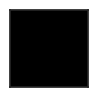

In [37]:
headers = ['#000000']
print('Headers Color:')
sns.palplot(sns.color_palette(headers))

Linear Regression Colors:


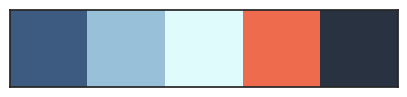

In [38]:
l_r = ['#3d5a80', '#98c1d9', '#e0fbfc', '#ee6c4d', '#293241']
print('Linear Regression Colors:')
sns.palplot(sns.color_palette(l_r))

Multiple Linear Regression Colors:


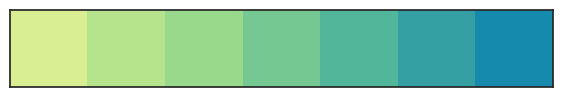

In [39]:
m_l_r = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893',
         '#52b69a', '#34a0a4', '#168aad']
print('Multiple Linear Regression Colors:')
sns.palplot(sns.color_palette(m_l_r))

Polynomial Regression Colors:


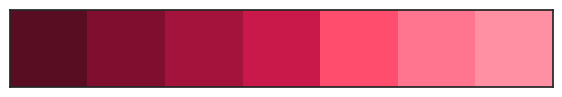

In [40]:
p_r = ['#590d22', '#800f2f', '#a4133c', '#c9184a',
       '#ff4d6d', '#ff758f', '#ff8fa3']
print('Polynomial Regression Colors:')
sns.palplot(sns.color_palette(p_r))

Bias-Variance Tradeoff Colors:


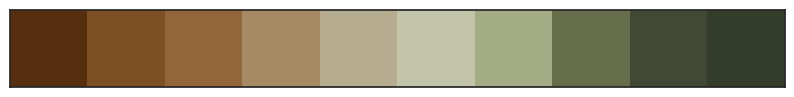

In [41]:
b_v_t = ['#582f0e', '#7f4f24', '#936639', '#a68a64','#b6ad90',
         '#c2c5aa', '#a4ac86', '#656d4a', '#414833', '#333d29']
print('Bias-Variance Tradeoff Colors:')
sns.palplot(sns.color_palette(b_v_t))

# **Simple Linear Regression**

In [42]:
df = pd.read_csv('/kaggle/input/regression/IceCreamData.csv')
df.sample(10)

Temperature     Revenue
460    38.668202  891.413646
174    16.379573  376.554472
88     29.305039  642.227291
248    16.300125  394.168620
377    11.177152  278.731962
178    22.634735  518.216105
410    21.129126  493.226636
154    23.349034  586.138767
135    22.841970  516.548601
308    33.314998  756.037702

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [44]:
df.describe()

Temperature      Revenue
count   500.000000   500.000000
mean     22.232225   521.570777
std       8.096388   175.404751
min       0.000000    10.000000
25%      17.122258   405.558681
50%      22.392791   529.368565
75%      27.740674   642.257922
max      45.000000  1000.000000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1280x960 with 0 Axes>

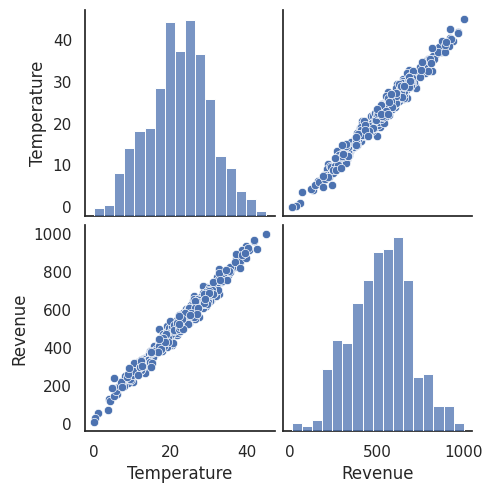

In [45]:
plt.figure(dpi=(200))
sns.pairplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

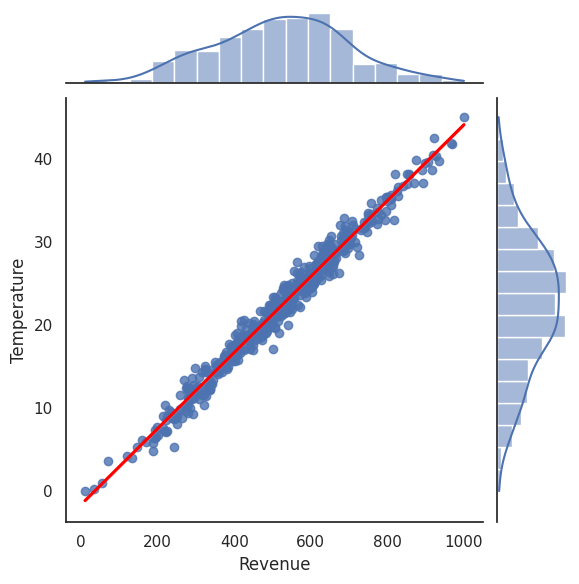

In [46]:
sns.set_theme(style='white')
plt.figure(dpi=(100))
sns.jointplot(x=df['Revenue'], y=df['Temperature'], kind='reg',
              line_kws={'color': 'red'})

<Axes: xlabel='Revenue', ylabel='Temperature'>

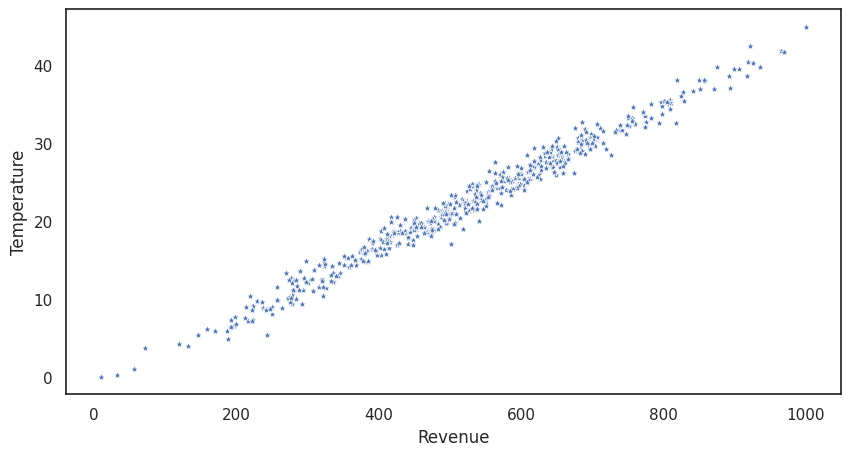

In [47]:
plt.figure(figsize=(10, 5), dpi=(100))
sns.scatterplot(x=df['Revenue'], y=df['Temperature'], marker='*')

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df[['Temperature']]
y = df['Revenue']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.33, random_state=101)

In [51]:
print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 500
**************************************************
Total # of sample in train dataset: 335
Shape of X_train: (335, 1)
**************************************************
Total # of sample in test dataset: 165
Shape of X_test: (165, 1)


In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression(fit_intercept=True)

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
pred = model.predict(X_test)

In [56]:
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

Train score of trained model: 97.86733638283377


In [57]:
test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Test score of trained model: 98.18365687594093


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


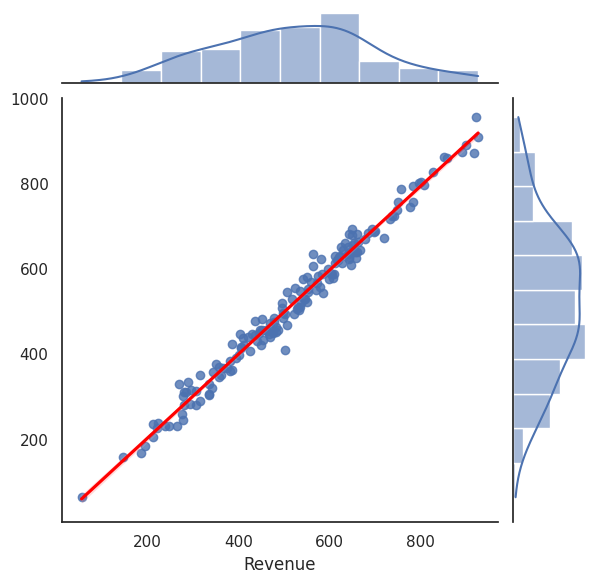

In [58]:
sns.set_theme(style='white')
sns.jointplot(x=y_test, y=pred, kind='reg',
              line_kws={'color': 'red'})

# **Model Evaluation**

In [59]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [60]:
k = X_test.shape[1]
n = len(X_test)

In [61]:
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [62]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric       Score
0     MSE  549.213498
1    RMSE   23.435305
2     MAE   18.723628
3    MAPE    4.210864
4      r2    0.981837
5  adj_r2    0.981725

# **Multiple Linear Regression**

In [63]:
#SimpleLinearRegression−−>y=b0+b1x1.

#MultipleLinearRegression−−>y=b0+b1x1+b2x2+⋯+bnxn.

In [64]:
df = pd.read_csv('/kaggle/input/regression/kc_house_data.csv')
df.sample(10)

id             date      price  bedrooms  bathrooms  \
19953  4051150100  20140929T000000   260000.0         3       2.50   
1336   1250202255  20140605T000000   647500.0         3       1.75   
19865  1772600510  20140620T000000   625000.0         3       2.50   
3388   8901001335  20141103T000000   637000.0         4       2.75   
550    4099500935  20140723T000000   705000.0         3       1.75   
18947  2473371570  20141119T000000   313500.0         3       1.75   
12358  5104520640  20150220T000000   324950.0         4       2.50   
2014   6699940140  20140908T000000   352000.0         4       2.50   
19736  3616600003  20150302T000000  1680000.0         3       2.50   
19374  2215450100  20150112T000000   330000.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
19953         1427      4337     2.0           0     0  ...      7   
1336          1290      3870     1.0           0     0  ...      7   
19865         2440      4800     2.0           0     0  ...     10   
3388          2850      7510     2.0           0     0  ...      8   
550           2180     10221     1.0           0     2  ...      7   
18947         1610      7350     1.0           0     0  ...      8   
12358         1770      5000     2.0           0     0  ...      7   
2014          2470      5015     2.0           0     0  ...      8   
19736         4090     16972     2.0           0     2  ...     11   
19374         2240      7589     2.0           0     0  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
19953        1427              0      2009             0    98042  47.3857   
1336         1290              0      1916             0    98144  47.5873   
19865        2440              0      2014             0    98106  47.5595   
3388         2850              0      2008             0    98125  47.7097   
550          1140           1040      1946             0    98040  47.5885   
18947        1610              0      1974             0    98058  47.4503   
12358        1770              0      2004             0    98038  47.3506   
2014         2470              0      2004             0    98038  47.3457   
19736        3590            500      2007             0    98177  47.7258   
19374        2240              0      1994             0    98030  47.3824   

          long  sqft_living15  sqft_lot15  
19953 -122.162           1443        4347  
1336  -122.290           2020        5850  
19865 -122.365           1180        5480  
3388  -122.305           1510        8833  
550   -122.248           2180        8535  
18947 -122.131           2120        7350  
12358 -122.006           2080        5100  
2014  -122.041           2470        5100  
19736 -122.370           3740       16972  
19374 -122.207           2250        7300  

[10 rows x 21 columns]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [66]:
df.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [67]:
df.drop('id', axis=1, inplace=True)

In [68]:
df_v = df
df_v.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [69]:
df_v.drop(['date', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

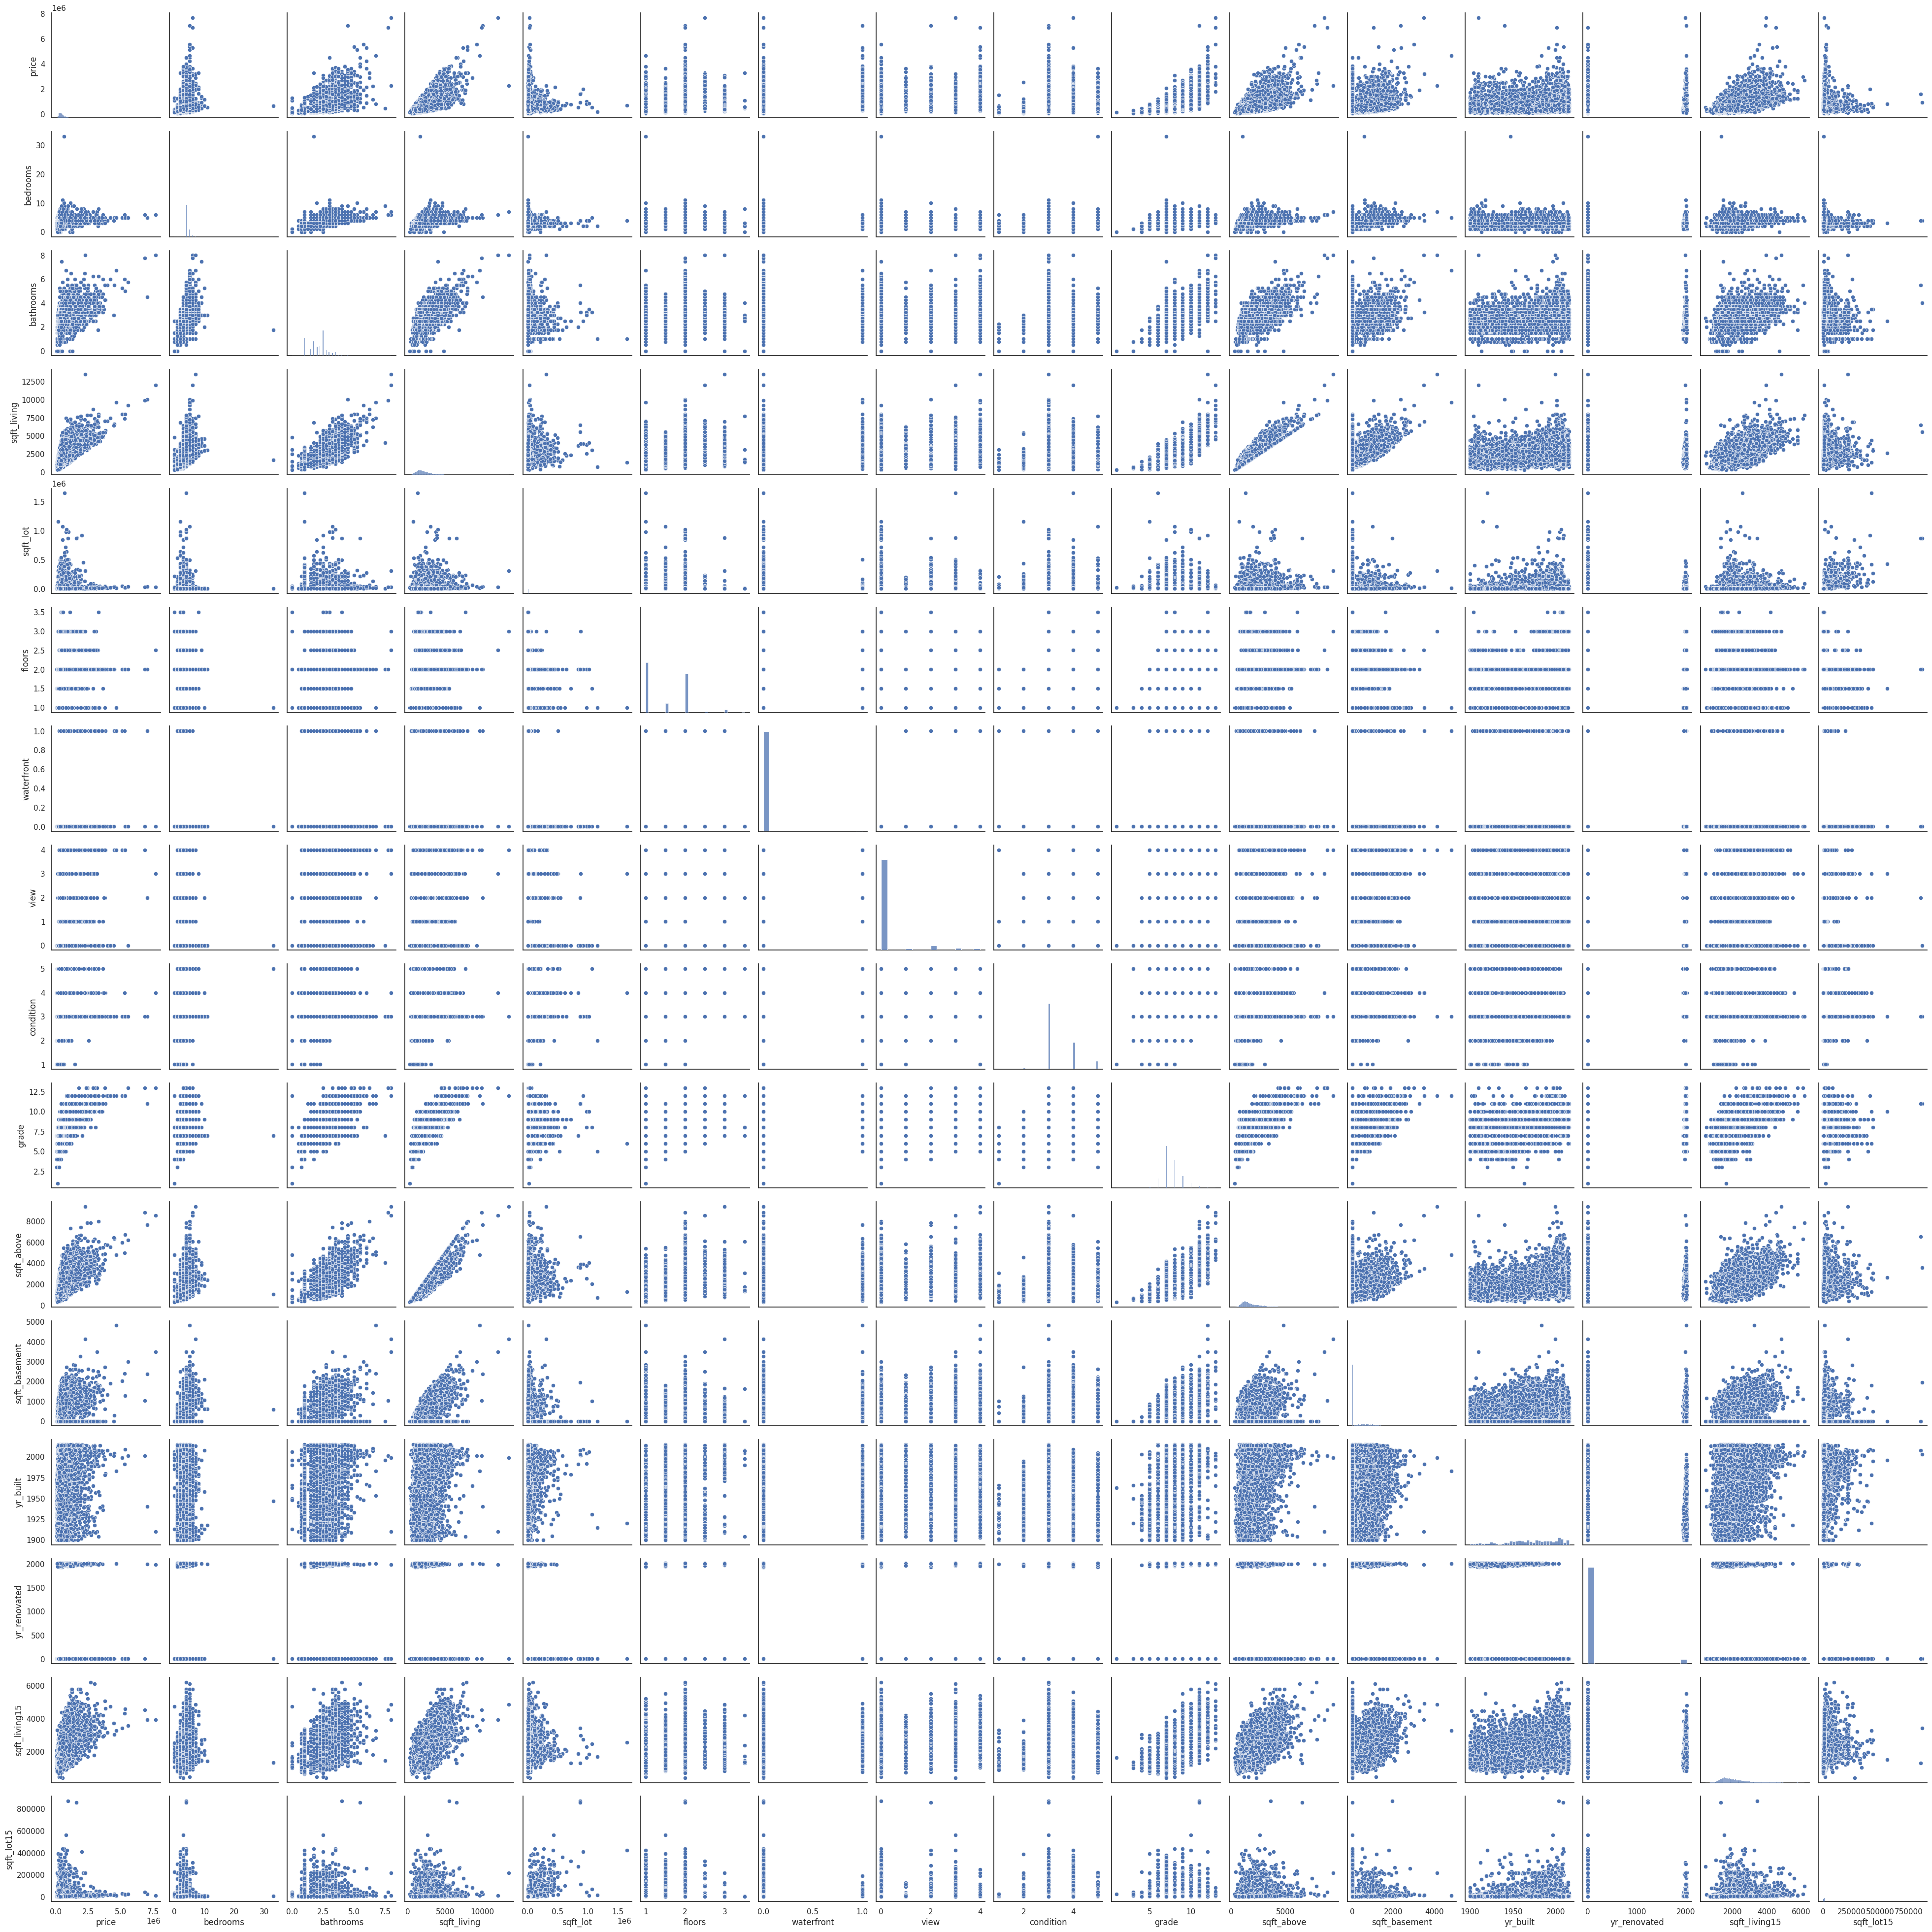

In [70]:
sns.pairplot(data=df_v)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


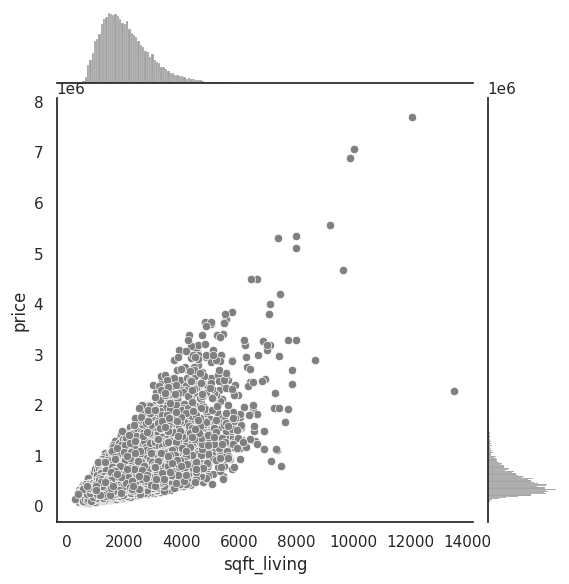

In [71]:
sns.jointplot(x='sqft_living', y='price', data=df_v, color='gray')

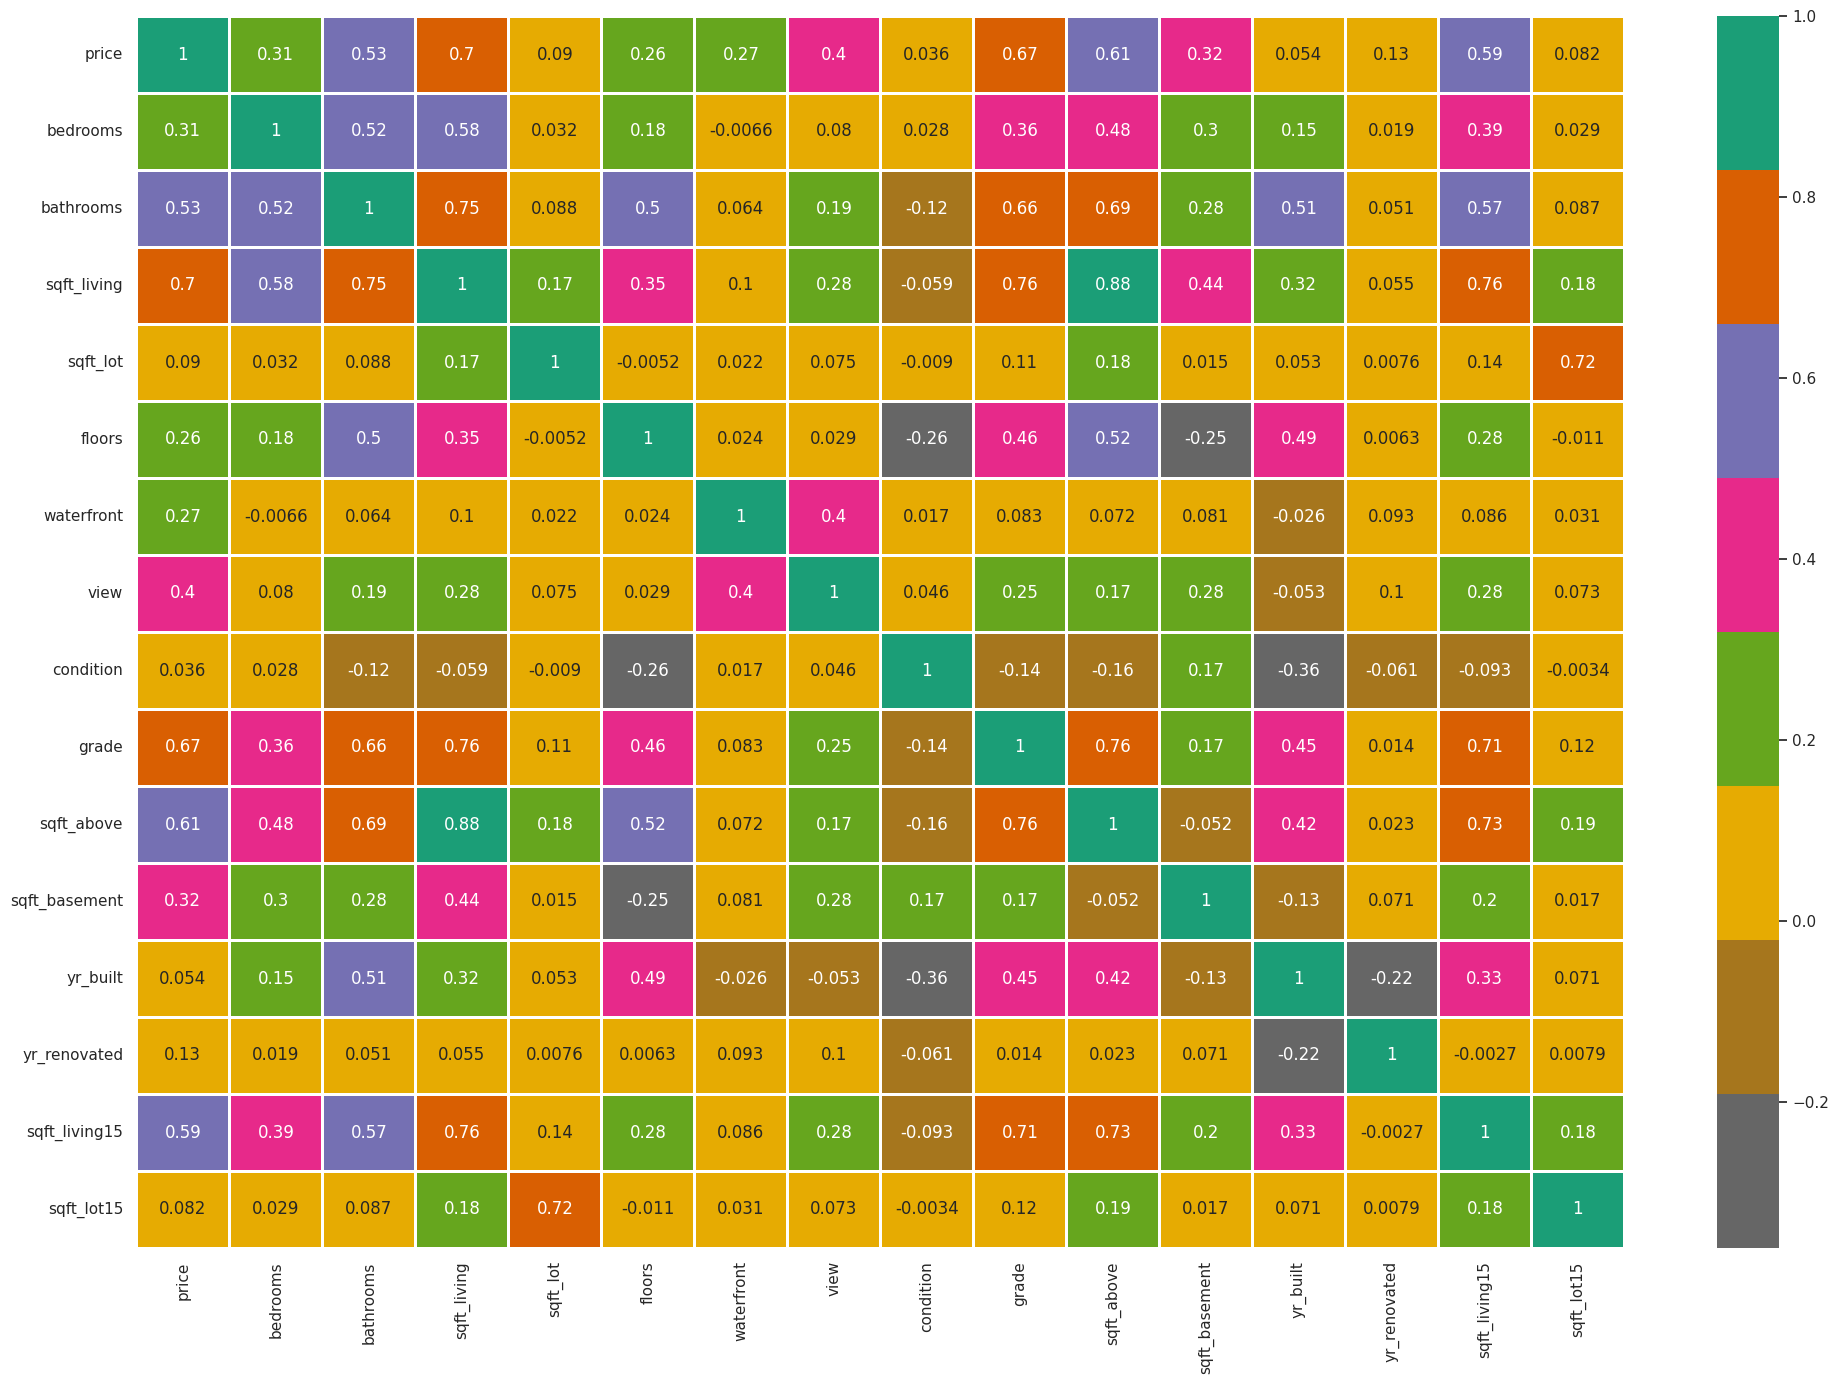

In [72]:
plt.figure(figsize=(24, 16))
sns.heatmap(df_v.corr(), annot=True, cmap='Dark2_r', linewidths=2)
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df.drop(['price'], axis=1)
y = df['price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 21613
**************************************************
Total # of sample in train dataset: 17290
Shape of X_train: (17290, 15)
**************************************************
Total # of sample in test dataset: 4323
Shape of X_test: (4323, 15)


In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

In [79]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [82]:
pred = model.predict(X_test)

In [83]:
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

Train score of trained model: 65.07293218091819


In [84]:
test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Test score of trained model: 66.48546558345167


In [85]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [ -34775.72254881   30948.07532707   75504.04878062    1099.37138108
   15945.53987329   48767.94867848   32809.65209006   14365.72891369
  142095.57041342   63379.59147356   37914.58333875 -103809.02071884
    4235.40211734   17735.23006288  -15457.12877519]
Linear Model Coefficient (b):  540739.7028340079


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


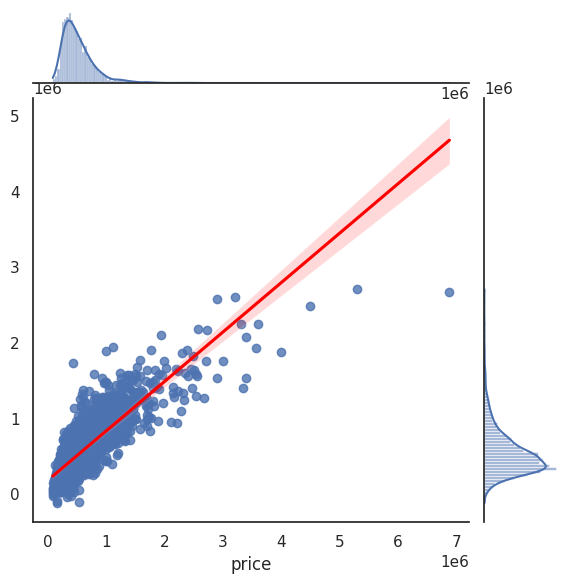

In [86]:
sns.set_theme(style='white')
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={'color': 'red'})

In [87]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [88]:
k = X_test.shape[1]
n = len(X_test)
print(k, n)

15 4323


In [89]:
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  4.572437e+10
1    RMSE  2.138326e+05
2     MAE  1.363322e+05
3    MAPE  2.878347e+01
4      r2  6.648547e-01
5  adj_r2  6.636874e-01

# **Polynomial Regression**

In [90]:
df = pd.read_csv('/kaggle/input/regression/EconomiesOfScale.csv')
df.sample(10)

Number of Units  Manufacturing Cost
293         3.752124           38.347923
635         4.950911           42.020070
639         4.969934           37.460747
102         2.794083           57.488360
205         3.357970           52.947274
88          2.704341           54.432536
185         3.264346           48.176167
834         5.661819           36.689063
418         4.197989           29.317949
796         5.536277           29.224046

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [92]:
df.describe()

Number of Units  Manufacturing Cost
count      1000.000000         1000.000000
mean          4.472799           40.052999
std           1.336241           10.595322
min           1.000000           20.000000
25%           3.594214           32.912036
50%           4.435958           38.345781
75%           5.324780           44.531822
max          10.000000          100.000000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1280x960 with 0 Axes>

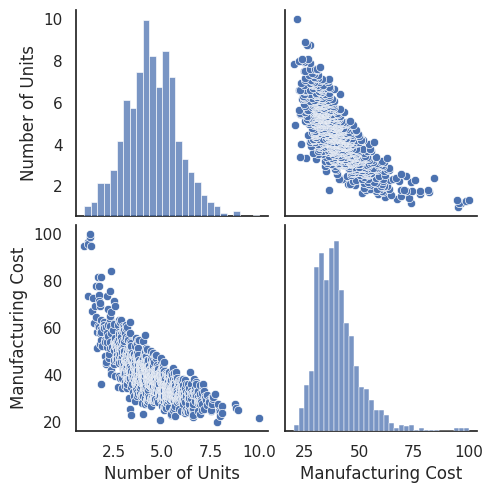

In [93]:
sns.set_theme(style='white')
plt.figure(dpi=(200))
sns.pairplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


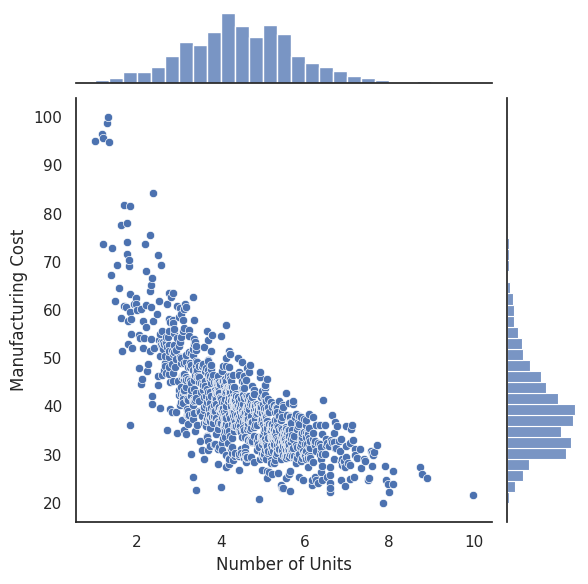

In [94]:
sns.jointplot(x='Number of Units', y = 'Manufacturing Cost', data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

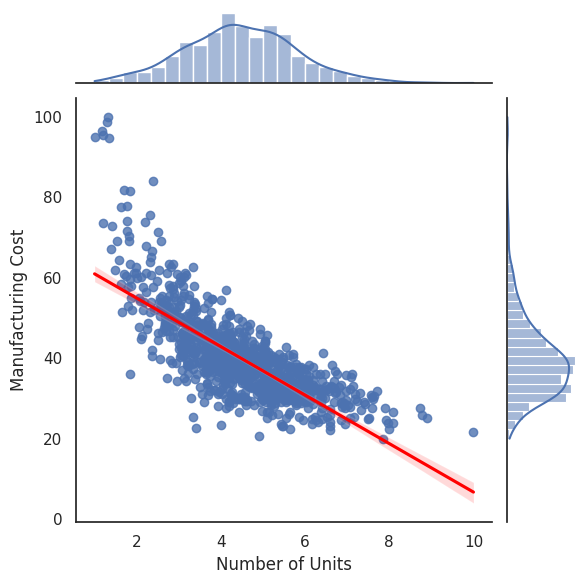

In [95]:
sns.set_theme(style='white')
plt.figure(dpi=(100))
sns.jointplot(x = df['Number of Units'], y = df['Manufacturing Cost'], kind='reg', line_kws={'color': 'red'})

<Axes: xlabel='Number of Units', ylabel='Manufacturing Cost'>

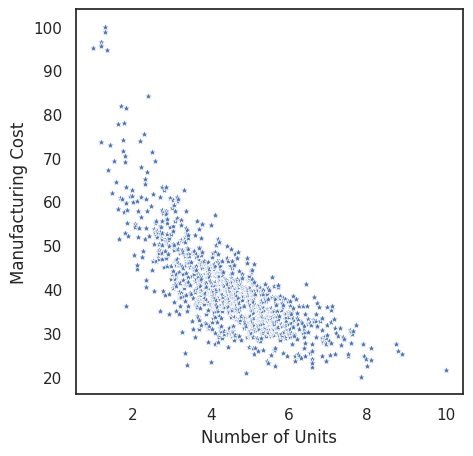

In [96]:
plt.figure(figsize=(5, 5), dpi=(100))
sns.scatterplot(x = df['Number of Units'], y = df['Manufacturing Cost'], marker="*")

In [97]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [98]:
X_train = X
y_train = y

In [99]:
print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)

Total # of sample in whole dataset: 1000
**************************************************
Total # of sample in train dataset: 1000
Shape of X_train: (1000, 1)
**************************************************


In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
poly_regressor = PolynomialFeatures(degree=6)

In [102]:
X_columns = poly_regressor.fit_transform(X_train)

In [103]:
model = LinearRegression()

In [104]:
model.fit(X_columns, y_train)

LinearRegression()

In [106]:
pred = model.predict(poly_regressor.transform(X_train))

Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

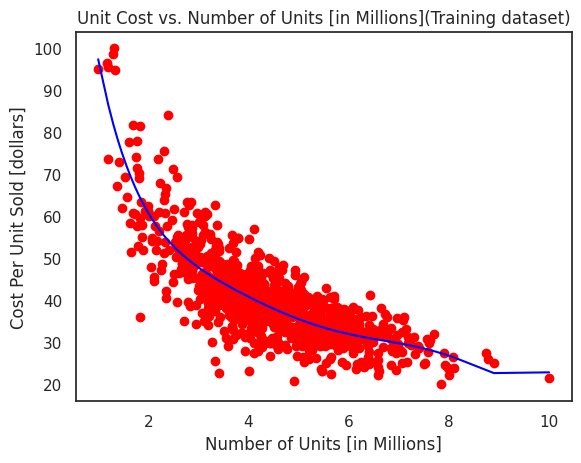

In [110]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, pred, color='blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

In [114]:
j = 0
plt.figure(figsize=(150, 150))

for i in range(1, 11):
    poly_regressor = PolynomialFeatures(degree=i)
    X_columns = poly_regressor.fit_transform(X_train)
    
    model = LinearRegression()
    
    model.fit(X_columns, y_train)
    
    pred = model.predict(poly_regressor.transform(X_train))
    
    plt.subplot(5, 2, j+1)
    plt.scatter(X_train, y_train, color = 'red', s = 115)
    plt.plot(X_train, pred, color = 'blue',linewidth = 5.5)
    plt.ylabel('Cost Per Unit Sold [dollars]')
    plt.xlabel('Number of Units [in Millions]')
    plt.title(f'Unit Cost vs. Number of Units [in Millions](Training dataset) - Degree =  {i}',color = 'black',fontsize = 75)
    j += 1

# **Bias - Variance Tradeoff**

In [115]:
df = pd.read_csv('/kaggle/input/regression/kc_house_data.csv')
df.sample(10)

id             date      price  bedrooms  bathrooms  \
11770  3592500800  20141018T000000  1850000.0         5       3.25   
11824  4137010310  20140822T000000   205000.0         3       2.00   
19798   255450340  20140827T000000   387865.0         3       2.50   
19126  3500100047  20141008T000000   275400.0         2       1.00   
21432  7104100110  20150511T000000   899000.0         4       3.50   
21231  6306800020  20141111T000000   452000.0         4       2.50   
16767   625049153  20140603T000000   605000.0         3       2.00   
10434  7979900806  20150311T000000   294950.0         2       1.00   
636    6131600060  20140815T000000   214000.0         3       1.00   
18969  8682281510  20150128T000000   665000.0         2       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
11770         3680      6060     2.0           0     0  ...      9   
11824         1800     11419     1.0           0     0  ...      8   
19798         2370      4200     2.0           0     0  ...      8   
19126          890      8180     1.0           0     0  ...      7   
21432         2490      5500     2.0           0     0  ...      9   
21231         2716      7850     2.0           0     0  ...      9   
16767         2060      4040     1.0           0     0  ...      8   
10434         1060      7868     1.0           0     0  ...      7   
636           1200      8316     1.0           0     0  ...      6   
18969         2300      6984     1.0           0     0  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11770        2630           1050      1925             0    98112  47.6341   
11824        1800              0      1989             0    98092  47.2623   
19798        2370              0      2014             0    98038  47.3696   
19126         890              0      1947             0    98155  47.7370   
21432        1780            710      2015             0    98136  47.5499   
21231        2716              0      2014             0    98030  47.3520   
16767        1120            940      1947             0    98103  47.6798   
10434        1060              0      1952             0    98155  47.7414   
636          1200              0      1953             0    98002  47.3221   
18969        2300              0      2006             0    98053  47.7087   

          long  sqft_living15  sqft_lot15  
11770 -122.304           3050        5850  
11824 -122.217           2220       11406  
19798 -122.018           2370        4200  
19126 -122.300           1130        8180  
21432 -122.393           1710        5500  
21231 -122.197           2580       14448  
16767 -122.352           1500        4000  
10434 -122.295           1530       10728  
636   -122.215           1200        8316  
18969 -122.015           1820        4950  

[10 rows x 21 columns]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [117]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [118]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

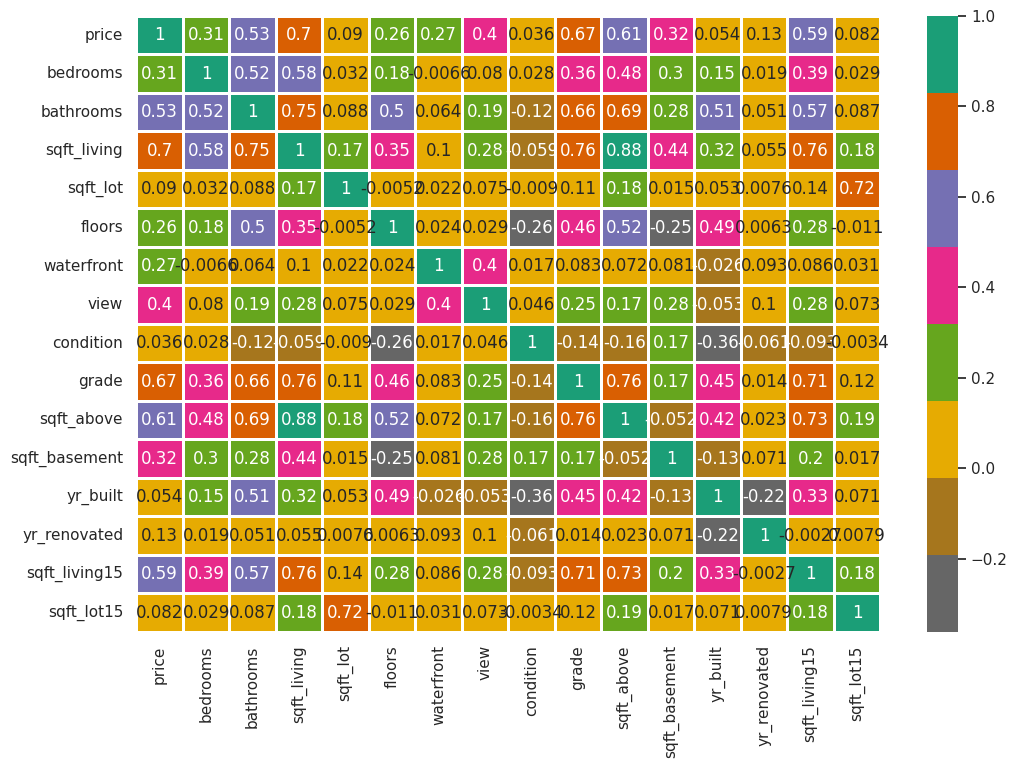

In [119]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [120]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 21613
**************************************************
Total # of sample in train dataset: 19451
Shape of X_train: (19451, 15)
**************************************************
Total # of sample in test dataset: 2162
Shape of X_test: (2162, 15)


In [124]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Ridge Regression (L2 Regularization)**

In [125]:
from sklearn.linear_model import Ridge

In [126]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 65.29196653133818
Test score of trained model: 65.79723171418634


In [127]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  5.388590e+10
1    RMSE  2.321334e+05
2     MAE  1.374801e+05
3      r2  6.579723e-01
4  adj_r2  6.555816e-01

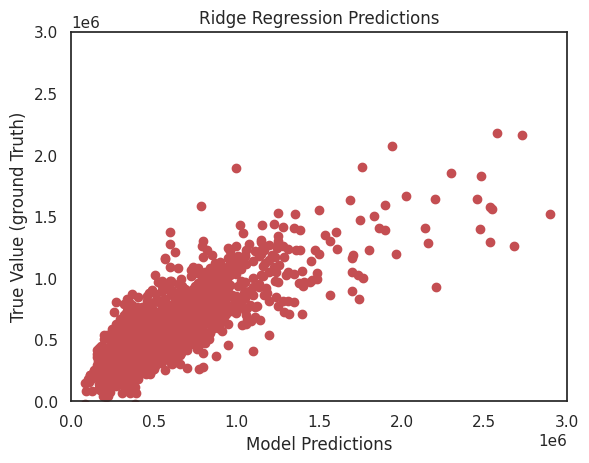

In [128]:
plt.plot(y_test, pred, "o", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

# **Lasso Regression (L1 Regularization)**

In [129]:
from sklearn.linear_model import Lasso

In [132]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 65.2919665313383
Test score of trained model: 65.79723208357473


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.767e+13, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


In [133]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  5.388590e+10
1    RMSE  2.321334e+05
2     MAE  1.374801e+05
3      r2  6.579723e-01
4  adj_r2  6.555816e-01

# **Elastic Net**

In [134]:
from sklearn.linear_model import ElasticNet

In [136]:
e_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
e_net.fit(X_train, y_train)

pred = e_net.predict(X_test)

train_score = e_net.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = e_net.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 65.17440101962227
Test score of trained model: 65.40282568748282


In [137]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  5.450728e+10
1    RMSE  2.334679e+05
2     MAE  1.366960e+05
3      r2  6.540283e-01
4  adj_r2  6.516100e-01